## Spacy Basic NER

### Library

In [29]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

nlp = en_core_web_sm.load()

SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity [types](https://spacy.io/api/annotation):
<div>
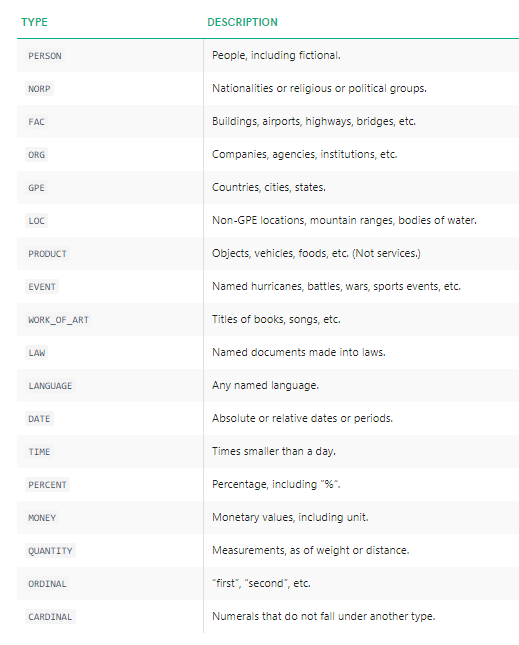
</div>

In [35]:
from pprint import pprint
nlp = spacy.load("en_core_web_sm")
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


### Token

During the above example, we were working on entity level, in the following example, we are demonstrating token-level entity annotation using the BILUO tagging scheme to describe the entity boundaries.
<div>
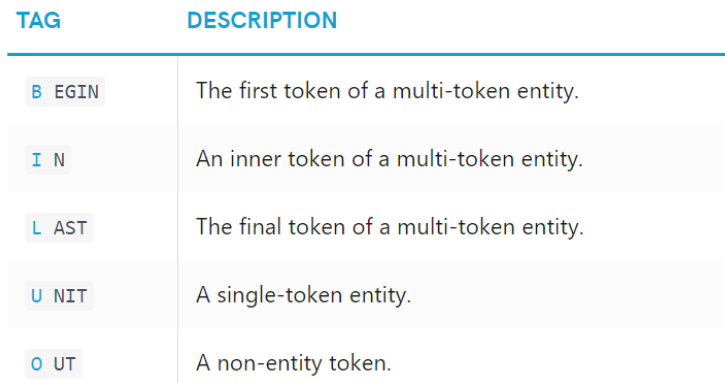
</div>
"B" means the token begins an entity, "I" means it is inside an entity, "O" means it is outside an entity, and "" means no entity tag is set.

In [44]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(European, 'B', 'NORP'),
 (authorities, 'O', ''),
 (fined, 'O', ''),
 (Google, 'B', 'ORG'),
 (a, 'O', ''),
 (record, 'O', ''),
 ($, 'B', 'MONEY'),
 (5.1, 'I', 'MONEY'),
 (billion, 'I', 'MONEY'),
 (on, 'O', ''),
 (Wednesday, 'B', 'DATE'),
 (for, 'O', ''),
 (abusing, 'O', ''),
 (its, 'O', ''),
 (power, 'O', ''),
 (in, 'O', ''),
 (the, 'O', ''),
 (mobile, 'O', ''),
 (phone, 'O', ''),
 (market, 'O', ''),
 (and, 'O', ''),
 (ordered, 'O', ''),
 (the, 'O', ''),
 (company, 'O', ''),
 (to, 'O', ''),
 (alter, 'O', ''),
 (its, 'O', ''),
 (practices, 'O', '')]


### Extracting named entity from an article

In [45]:
from bs4 import BeautifulSoup
import requests
import re

def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents) # number of named entity in article

157

In [46]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 78,
         'GPE': 14,
         'ORG': 37,
         'CARDINAL': 3,
         'DATE': 22,
         'NORP': 2,
         'ORDINAL': 1})

In [47]:
# The following are three most frequent tokens
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 28), ('F.B.I.', 13), ('Trump', 12)]

In [50]:
# selecting one statement to learn more
sentences = [x for x in article.sents]
print(sentences[19])

Firing Mr. Strzok, however, removes a favorite target of Mr. Trump from the ranks of the F.B.I. and gives Mr. Bowdich and the F.B.I. director, Christopher A. Wray, a chance to move beyond the president


In [52]:
# Running displacy.render to generate the raw markup
displacy.render(nlp(str(sentences[19])), jupyter=True, style='ent')

spaCy’s built-in displaCy visualizer, here’s what the above sentence and its dependencies look like

In [65]:
displacy.render(nlp(str(sentences[19])), style='dep', jupyter = True, options = {'distance': 120})

We verbatim, extract part-of-speech and lemmatize this sentence

In [56]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[19])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('Firing', 'VERB', 'fire'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Strzok', 'PROPN', 'Strzok'),
 ('removes', 'VERB', 'remove'),
 ('favorite', 'ADJ', 'favorite'),
 ('target', 'NOUN', 'target'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Trump', 'PROPN', 'Trump'),
 ('ranks', 'NOUN', 'rank'),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('gives', 'VERB', 'give'),
 ('Mr.', 'PROPN', 'Mr.'),
 ('Bowdich', 'PROPN', 'Bowdich'),
 ('F.B.I.', 'PROPN', 'F.B.I.'),
 ('director', 'NOUN', 'director'),
 ('Christopher', 'PROPN', 'Christopher'),
 ('A.', 'PROPN', 'A.'),
 ('Wray', 'PROPN', 'Wray'),
 ('chance', 'NOUN', 'chance'),
 ('president', 'NOUN', 'president')]

In [58]:
# named entity
dict([(str(x), x.label_) for x in nlp(str(sentences[19])).ents])

{'Strzok': 'PERSON',
 'Trump': 'PERSON',
 'F.B.I.': 'ORG',
 'Bowdich': 'PERSON',
 'Christopher A. Wray': 'PERSON'}

In [60]:
# position of all the tokens with entity name
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[19]])

[(Firing, 'O', ''), (Mr., 'O', ''), (Strzok, 'B', 'PERSON'), (,, 'O', ''), (however, 'O', ''), (,, 'O', ''), (removes, 'O', ''), (a, 'O', ''), (favorite, 'O', ''), (target, 'O', ''), (of, 'O', ''), (Mr., 'O', ''), (Trump, 'B', 'PERSON'), (from, 'O', ''), (the, 'O', ''), (ranks, 'O', ''), (of, 'O', ''), (the, 'O', ''), (F.B.I., 'B', 'ORG'), (and, 'O', ''), (gives, 'O', ''), (Mr., 'O', ''), (Bowdich, 'B', 'PERSON'), (and, 'O', ''), (the, 'O', ''), (F.B.I., 'B', 'ORG'), (director, 'O', ''), (,, 'O', ''), (Christopher, 'B', 'PERSON'), (A., 'I', 'PERSON'), (Wray, 'I', 'PERSON'), (,, 'O', ''), (a, 'O', ''), (chance, 'O', ''), (to, 'O', ''), (move, 'O', ''), (beyond, 'O', ''), (the, 'O', ''), (president, 'O', '')]


Finally visualizing for entire paragraph

In [62]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

## Building from Scratch

#### Input File

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\saurabhkumar9\1. NLP Practicum Materials\Data\NER.csv",encoding='latin1')
df.drop(['Sentence #','POS'],axis=1, inplace = True)

In [6]:
df.head()

,Word,Tag
0,Thousands,O
1,of,O
2,demonstrators,O
3,have,O
4,marched,O


In [8]:
df.to_csv('output.tsv',sep='\t',index=False,header=False)

#### File Conversion
Save csv and tsv file 

In [10]:
# Convert .tsv file to dataturks json format. 
import json
import logging
import sys
def tsv_to_json_format(input_path,output_path,unknown_label):
    try:
        f=open(input_path,'r') # input file
        fp=open(output_path, 'w') # output file
        data_dict={}
        annotations =[]
        label_dict={}
        s=''
        start=0
        for line in f:
            if line[0:len(line)-1]!='.\tO':
                word,entity=line.split('\t')
                s+=word+" "
                entity=entity[:len(entity)-1]
                if entity!=unknown_label:
                    if len(entity) != 1:
                        d={}
                        d['text']=word
                        d['start']=start
                        d['end']=start+len(word)-1  
                        try:
                            label_dict[entity].append(d)
                        except:
                            label_dict[entity]=[]
                            label_dict[entity].append(d) 
                start+=len(word)+1
            else:
                data_dict['content']=s
                s=''
                label_list=[]
                for ents in list(label_dict.keys()):
                    for i in range(len(label_dict[ents])):
                        if(label_dict[ents][i]['text']!=''):
                            l=[ents,label_dict[ents][i]]
                            for j in range(i+1,len(label_dict[ents])): 
                                if(label_dict[ents][i]['text']==label_dict[ents][j]['text']):  
                                    di={}
                                    di['start']=label_dict[ents][j]['start']
                                    di['end']=label_dict[ents][j]['end']
                                    di['text']=label_dict[ents][i]['text']
                                    l.append(di)
                                    label_dict[ents][j]['text']=''
                            label_list.append(l)                          
                            
                for entities in label_list:
                    label={}
                    label['label']=[entities[0]]
                    label['points']=entities[1:]
                    annotations.append(label)
                data_dict['annotation']=annotations
                annotations=[]
                json.dump(data_dict, fp)
                fp.write('\n')
                data_dict={}
                start=0
                label_dict={}
    except Exception as e:
        logging.exception("Unable to process file" + "\n" + "error = " + str(e))
        return None

tsv_to_json_format("output.tsv",'output.json','abc')

In [16]:
# Jason to SpaCy readable format conversion
def convert_dataturks_to_spacy(dataturks_JSON_FilePath):
    try:
        training_data = []
        lines=[]
        with open(dataturks_JSON_FilePath, 'r') as f:
            lines = f.readlines()

        for line in lines:
            data = json.loads(line)
            text = data['content']
            entities = []
            for annotation in data['annotation']:
                #only a single point in text annotation.
                point = annotation['points'][0]
                labels = annotation['label']
                # handle both list of labels or a single label.
                if not isinstance(labels, list):
                    labels = [labels]

                for label in labels:
                    #dataturks indices are both inclusive [start, end] but spacy is not [start, end)
                    entities.append((point['start'], point['end'] + 1 ,label))


            training_data.append((text, {"entities" : entities}))

        return training_data
    except Exception as e:
        logging.exception("Unable to process " + dataturks_JSON_FilePath + "\n" + "error = " + str(e))
        return None

In [18]:
spacy_format = convert_dataturks_to_spacy('output.json')

#### Training

In [108]:
#!/usr/bin/env python
# coding: utf8

# Training additional entity types using spaCy
from __future__ import unicode_literals, print_function
import pickle
import plac # will be useful  
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding


# New entity labels
# Specify the new entity labels which you want to add here
LABEL = ['I-geo', 'B-geo', 'I-art', 'B-art', 'B-tim', 'B-nat', 'B-eve', 'O', 'I-per', 'I-tim', 'I-nat', 'I-eve', 'B-per', 
         'I-org', 'B-gpe', 'B-org', 'I-gpe']

"""
geo = Geographical Entity
org = Organization
per = Person
gpe = Geopolitical Entity
tim = Time indicator
art = Artifact
eve = Event
nat = Natural Phenomenon
"""
# Loading training data 
TRAIN_DATA = spacy_format[0:1000] # Train Set

# if we want to run from cmd i.e. .py file directly
'''@plac.annotations(
    model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
    new_model_name=("New model name for model meta.", "option", "nm", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_iter=("Number of training iterations", "option", "n", int))'''

model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
new_model_name=("New model name for model meta.", "option", "nm", str),
output_dir=("Optional output directory", "option", "o", Path),
n_iter=("Number of training iterations", "option", "n", int)

def main(model=None, new_model_name='new_model', output_dir=None, n_iter=10):
    """Setting up the pipeline and entity recognizer, and training the new entity."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spacy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank('en')  # create blank Language class
        print("Created blank 'en' model")
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner)
    else:
        ner = nlp.get_pipe('ner')

    for i in LABEL:
        ner.add_label(i)   # Add new entity labels to entity recognizer

    if model is None:
        optimizer = nlp.begin_training()
    else:
        optimizer = nlp.entity.create_optimizer()

    # Get names of other pipes to disable them during training to train only NER
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses = {}
            batches = minibatch(TRAIN_DATA, size=compounding(4., 32., 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.35,
                           losses=losses)
            print('Losses', losses)

''' # Save model 
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.meta['name'] = new_model_name  # rename model
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # Test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        doc2 = nlp2(test_text)
        for ent in doc2.ents:
            print(ent.label_, ent.text)
'''

    # Test the trained model
    test_text = 'Gianni Infantino is the president of FIFA.'
    doc = nlp(test_text)
    print("Entities in '%s'" % test_text)
    for ent in doc.ents:
        print(ent.label_, ent.text)

    # save model to output directory
    nlp.meta['name'] = new_model_name  # rename model
    nlp.to_disk('C:/Users/saurabhkumar9/1. NLP Practicum Materials')
    print("Saved model to", 'C:/Users/saurabhkumar9/1. NLP Practicum Materials')
    
    # Test the saved model
    nlp2 = spacy.load('C:/Users/saurabhkumar9/1. NLP Practicum Materials')
    doc2 = nlp2(test_text)
    for ent in doc2.ents:
        print(ent.label_, ent.text)
    

if __name__ == '__main__':
    '''plac.call(main)''' # for .py file
    main()

Created blank 'en' model
Losses {'ner': 4397.895212366163}
Losses {'ner': 2785.7865972459113}
Losses {'ner': 2248.072429793154}
Losses {'ner': 1915.6842175236015}
Losses {'ner': 1673.5598948173592}
Losses {'ner': 1540.5898235187615}
Losses {'ner': 1386.129691025116}
Losses {'ner': 1268.4849623157509}
Losses {'ner': 1110.6280517388768}
Losses {'ner': 1133.3228540873622}
Entities in 'Gianni Infantino is the president of FIFA.'
B-per Gianni
I-per Infantino
Saved model to C:/Users/saurabhkumar9/1. NLP Practicum Materials
B-per Gianni
I-per Infantino


#### Score

P.Loss : Parser loss
N.Loss : NER loss 
UAS : Unlabelled attachment score for parser 
NER P. : NER Precision on development data
NER R. : NER recall on development data
NER F. : NER F on development data
Tag % :Tag accuracy on development data 
T Token % : Tokenization accuracy on development data (irrelevant if you use the .iob format, which prevents you from learning from incorrectly tokenized text).

In [111]:
import spacy
from spacy.gold import GoldParse
from spacy.scorer import Scorer

def evaluate(ner_model, examples):
    scorer = Scorer()
    for input_, annot in examples:
        doc_gold_text = ner_model.make_doc(input_)
        gold = GoldParse(doc_gold_text, entities=annot)
        pred_value = ner_model(input_)
        scorer.score(pred_value, gold)
    return scorer.scores

In [118]:
Test_Data = [
    ("Poland 's President Alexander Kwasniewski can not run for re-election because he has already served two terms ",
       [(0, 6, 'B-org'),
        (10, 19, 'B-per'),
        (20, 29, 'I-per'),
        (30, 41, 'I-per')]),
 ('The new eruption happened as Indonesian President Susilo Bambang Yudhoyono visited emergency shelters housing 70,000 evacuees from earlier eruptions ',
       [(29, 39, 'B-gpe'),
        (40, 49, 'B-per'),
        (50, 56, 'I-per'),
        (57, 64, 'I-per'),
        (65, 74, 'I-per')]),
  ("The tiny Gulf kingdom , whose Shi'ite majority is ruled by a Sunni minority , has close ties with the United States and hosts the U.S. Navy 's Fifth Fleet ",
        [(61, 66, 'B-geo'),
        (102, 108, 'B-org'),
        (130, 134, 'B-org'),
        (109, 115, 'I-org'),
        (135, 139, 'I-org'),
        (140, 142, 'I-org'),
        (143, 148, 'I-org'),
        (149, 154, 'I-org')])]

ner_model = spacy.load('C:/Users/saurabhkumar9/1. NLP Practicum Materials') # for spaCy's pretrained use 'en_core_web_sm'
results = evaluate(ner_model, Test_Data)

In [122]:
nlp2 = spacy.load('C:/Users/saurabhkumar9/1. NLP Practicum Materials')
doc2 = nlp2("Poland 's President Alexander Kwasniewski can not run for re-election because he has already served two terms")
for ent in doc2.ents:
    print(ent.label_, ent.text)

B-gpe Poland
B-per President
I-per Alexander
I-per Kwasniewski
B-tim two


In [119]:
results

{'uas': 0.0,
 'las': 0.0,
 'ents_p': 63.1578947368421,
 'ents_r': 70.58823529411765,
 'ents_f': 66.66666666666667,
 'tags_acc': 0.0,
 'token_acc': 100.0}

In [123]:
from spacy.gold import docs_to_json

doc = nlp("I like London")
json_data = docs_to_json([doc])
json_data

{'id': 0,
 'paragraphs': [{'raw': 'I like London',
   'sentences': [{'tokens': [{'id': 0,
       'orth': 'I',
       'tag': 'PRP',
       'head': 1,
       'dep': 'nsubj',
       'ner': 'O'},
      {'id': 1,
       'orth': 'like',
       'tag': 'VBP',
       'head': 0,
       'dep': 'ROOT',
       'ner': 'O'},
      {'id': 2,
       'orth': 'London',
       'tag': 'NNP',
       'head': -1,
       'dep': 'dobj',
       'ner': 'U-GPE'}],
     'brackets': []}]}]}

In [124]:
from spacy.gold import offsets_from_biluo_tags

doc = nlp("I like London.")
tags = ["O", "O", "U-LOC", "O"]
entities = offsets_from_biluo_tags(doc, tags)
assert entities == [(7, 13, "LOC")]

In [126]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)
matcher.add("OBAMA", None, nlp("Barack Obama"))
doc = nlp("Barack Obama lifts America one last time in emotional farewell")
matches = matcher(doc)
matches

[(7732777389095836264, 0, 2)]

In [127]:
GoldParse()

NameError: name 'doc_gold_text' is not defined

#### [Spacy Example](https://spacy.io/usage/training#ner)

In [93]:
#!/usr/bin/env python
# coding: utf8
"""Example of training an additional entity type

This script shows how to add a new entity type to an existing pretrained NER
model. To keep the example short and simple, only four sentences are provided
as examples. In practice, you'll need many more — a few hundred would be a
good start. You will also likely need to mix in examples of other entity
types, which might be obtained by running the entity recognizer over unlabelled
sentences, and adding their annotations to the training set.

The actual training is performed by looping over the examples, and calling
`nlp.entity.update()`. The `update()` method steps through the words of the
input. At each word, it makes a prediction. It then consults the annotations
provided on the GoldParse instance, to see whether it was right. If it was
wrong, it adjusts its weights so that the correct action will score higher
next time.

After training your model, you can save it to a directory. We recommend
wrapping models as Python packages, for ease of deployment.

For more details, see the documentation:
* Training: https://spacy.io/usage/training
* NER: https://spacy.io/usage/linguistic-features#named-entities

Compatible with: spaCy v2.1.0+
Last tested with: v2.1.0
"""
from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding


# new entity label
LABEL = "ANIMAL"

# training data
# Note: If you're using an existing model, make sure to mix in examples of
# other entity types that spaCy correctly recognized before. Otherwise, your
# model might learn the new type, but "forget" what it previously knew.
# https://explosion.ai/blog/pseudo-rehearsal-catastrophic-forgetting
TRAIN_DATA = [
    (
        "Horses are too tall and they pretend to care about your feelings",
        {"entities": [(0, 6, LABEL)]},
    ),
    ("Do they bite?", {"entities": []}),
    (
        "horses are too tall and they pretend to care about your feelings",
        {"entities": [(0, 6, LABEL)]},
    ),
    ("horses pretend to care about your feelings", {"entities": [(0, 6, LABEL)]}),
    (
        "they pretend to care about your feelings, those horses",
        {"entities": [(48, 54, LABEL)]},
    ),
    ("horses?", {"entities": [(0, 6, LABEL)]}),
]



model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
new_model_name=("New model name for model meta.", "option", "nm", str),
output_dir=("Optional output directory", "option", "o", Path),
n_iter=("Number of training iterations", "option", "n", int),

def main(model=None, new_model_name="animal", output_dir=None, n_iter=30):
    """Set up the pipeline and entity recognizer, and train the new entity."""
    random.seed(0)
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    # Add entity recognizer to model if it's not in the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner)
    # otherwise, get it, so we can add labels to it
    else:
        ner = nlp.get_pipe("ner")

    ner.add_label(LABEL)  # add new entity label to entity recognizer
    # Adding extraneous labels shouldn't mess anything up
    ner.add_label("VEGETABLE")
    if model is None:
        optimizer = nlp.begin_training()
    else:
        optimizer = nlp.resume_training()
    move_names = list(ner.move_names)
    # get names of other pipes to disable them during training
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            batches = minibatch(TRAIN_DATA, size=sizes)
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.35, losses=losses)
            print("Losses", losses)

    # test the trained model
    test_text = "Do you like horses?"
    doc = nlp(test_text)
    print("Entities in '%s'" % test_text)
    for ent in doc.ents:
        print(ent.label_, ent.text)

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.meta["name"] = new_model_name  # rename model
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        # Check the classes have loaded back consistently
        assert nlp2.get_pipe("ner").move_names == move_names
        doc2 = nlp2(test_text)
        for ent in doc2.ents:
            print(ent.label_, ent.text)


if __name__ == "__main__":
    main()

Created blank 'en' model
Losses {'ner': 38.28393095731735}
Losses {'ner': 18.139810390770435}
Losses {'ner': 8.475045133927779}
Losses {'ner': 9.011292936842665}
Losses {'ner': 7.423733171694948}
Losses {'ner': 6.350751778372796}
Losses {'ner': 2.3569401288748395}
Losses {'ner': 0.43704309913096795}
Losses {'ner': 0.11134220500206926}
Losses {'ner': 0.005216753272146426}
Losses {'ner': 0.01013969057708632}
Losses {'ner': 3.31981098478051e-06}
Losses {'ner': 1.8862105689720061e-07}
Losses {'ner': 9.007188240013628e-07}
Losses {'ner': 8.172364724829779e-06}
Losses {'ner': 0.0008679250012470263}
Losses {'ner': 9.972897145986478e-06}
Losses {'ner': 1.0758529682903429e-08}
Losses {'ner': 8.268700566792907e-08}
Losses {'ner': 4.3448789962954286e-07}
Losses {'ner': 3.896462425739414e-07}
Losses {'ner': 2.7554679040160485e-07}
Losses {'ner': 1.5484593435015533e-07}
Losses {'ner': 3.673036976044257e-06}
Losses {'ner': 3.564139178544778e-08}
Losses {'ner': 8.312897812688437e-07}
Losses {'ner': 2